# dhash

This is based on the hash algorithm from [this blog post](http://hackerfactor.com/blog/index.php?/archives/529-Kind-of-Like-That.html). It is very similar to the `ahash` and `phash` algorithm, so I did not annotate this one in as much detail.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

## Step 0. Loading Image

In [2]:
rawimg = imread("images/Alyson_Hannigan_200512.jpg")

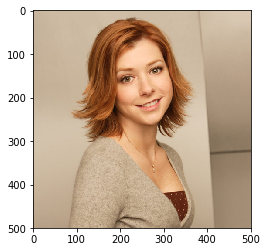

In [3]:
plt.imshow(rawimg)

## Step 1. Resize Image

We will resize the image to 8x9 images, because one extra row is needed by the algorithm.

In [4]:
scaledimg = resize(rawimg, (8, 9), anti_aliasing=True, mode='reflect')

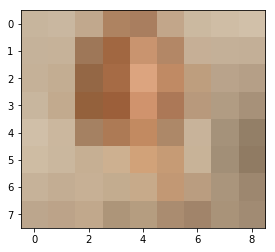

In [5]:
plt.imshow(scaledimg)

## Step 2. Convert to Grayscale

In [6]:
grayimg = rgb2gray(scaledimg)

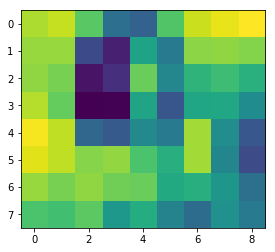

In [7]:
plt.imshow(grayimg)

## Step 3. Generate Hash

Now we will generate the hash. It is very simple, if a pixel is less than the pixel to the right of it, the bit will be 1, otherwise 0.

In [8]:
bits = []
for i in grayimg:
    for j in range(0,8):
        bits.append(i[j] < i[j+1])

In [9]:
hashimg = np.reshape(bits,(8,8))

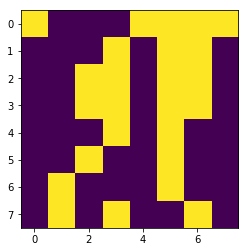

In [10]:
plt.imshow(hashimg)

In [11]:
def bool2int(x):
    y = 0
    for i,j in enumerate(x):
        y += j<<i
    return y

In [12]:
hash = bool2int(bits)
format(hash,"x")

'4a2224286c6c68f1'

# Implementation

The only optimization is converting to grayscale before resizing.

In [13]:
def dhash(raw):
    img = rgb2gray(raw)
    img = resize(img, (8, 9), anti_aliasing=True, mode='reflect')
    bits = []
    for i in img:
        for j in range(0,8):
            bits.append(i[j] < i[j+1])
    y = 0
    for i,j in enumerate(bits):
        y += j<<i
    return y

In [14]:
hsh = dhash(rawimg)
format(hsh,"x")

'4a2224286c6c68f1'